# SAT-ACT EDA
___

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# reads
act17 = pd.read_csv('../../Data/ACT-SAT/act_2017.csv')
act18 = pd.read_csv('../../Data/ACT-SAT/act_2018.csv')
sat17 = pd.read_csv('../../Data/ACT-SAT/sat_2017.csv')
sat18 = pd.read_csv('../../Data/ACT-SAT/sat_2018.csv')

In [3]:
act17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [4]:
act17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [5]:
act17[act17['Composite'] == '20.2x']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [6]:
# fixing erroneous data
act17.loc[51, ['Composite']] = 20.2

act17['Composite'] = act17['Composite'].astype(float)

In [7]:
act17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [8]:
# change Participation into numerical data
act17['Participation'] = [int(num.split('%')[0])/100 for num in act17['Participation']]

In [9]:
act17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [10]:
act17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [11]:
act17.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.651538,20.919231,21.173077,22.001923,21.040385,21.509615
std,0.318325,2.332132,1.963602,2.048672,3.151113,2.002083
min,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,0.310000,19.000000,19.400000,20.475000,19.900000,19.800000
50%,0.680000,20.550000,20.900000,21.700000,21.150000,21.400000
75%,1.000000,23.300000,23.100000,24.125000,22.525000,23.600000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [12]:
act17.sort_values('Science').head()

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,0.28,23.3,23.1,24.2,2.3,23.6
29,Nevada,1.00,16.3,18.0,18.1,18.2,17.8
25,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6
41,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7
34,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1


according to our [source](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf) Maryland's Science score should be 23.2

In [13]:
act17.loc[act17['State'] == 'Maryland', ['Science']] = 23.2

In [14]:
act17.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.651538,20.919231,21.173077,22.001923,21.442308,21.509615
std,0.318325,2.332132,1.963602,2.048672,1.723351,2.002083
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,0.310000,19.000000,19.400000,20.475000,19.975000,19.800000
50%,0.680000,20.550000,20.900000,21.700000,21.300000,21.400000
75%,1.000000,23.300000,23.100000,24.125000,23.200000,23.600000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [15]:
act17.shape

(52, 7)

In [16]:
act17.columns = act17.columns.str.lower()
act17.head()

,state,participation,english,math,reading,science,composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


___

In [17]:
act18.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [18]:
act18.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [19]:
# converting Participation to numerical data
act18['Participation'] = [int(num.split('%')[0])/100 for num in act18['Participation']]

In [20]:
act18.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [21]:
act18.loc[act18['State'] == 'Maine']

,State,Participation,Composite
19,Maine,0.07,24.0
20,Maine,0.07,24.0


In [22]:
act18 = act18.drop(19, axis=0).reset_index(drop=True)

In [23]:
act18.shape

(51, 3)

In [24]:
act18.describe()

,Participation,Composite
count,51.000000,51.000000
mean,0.617255,21.496078
std,0.340371,2.111583
min,0.070000,17.700000
25%,0.285000,19.950000
50%,0.660000,21.300000
75%,1.000000,23.650000
max,1.000000,25.600000


according to our [source](https://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf) the national participation rate was 55% and the average composite score was 20.8

In [25]:
act18nat = pd.DataFrame([{'State': 'National', 'Participation': .55, 'Composite': 20.8}])
act18nat

,State,Participation,Composite
0,National,0.55,20.8


In [26]:
act18 = pd.concat([act18nat, act18], ignore_index=True)

In [27]:
act18.columns = act18.columns.str.lower()
act18.head()

,state,participation,composite
0,National,0.55,20.8
1,Alabama,1.00,19.1
2,Alaska,0.33,20.8
3,Arizona,0.66,19.2
4,Arkansas,1.00,19.4


In [28]:
act18.shape

(52, 3)

___

In [29]:
sat17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [30]:
sat17.shape

(51, 5)

In [31]:
sat17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [32]:
sat17['Participation'] = [int(num.split('%')[0])/100 for num in sat17['Participation']]

In [33]:
sat17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [34]:
sat17.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039
std,0.352766,45.666901,84.909119,92.494812
min,0.020000,482.000000,52.000000,950.000000
25%,0.040000,533.500000,522.000000,1055.500000
50%,0.380000,559.000000,548.000000,1107.000000
75%,0.660000,613.000000,599.000000,1212.000000
max,1.000000,644.000000,651.000000,1295.000000


In [35]:
sat17.loc[sat17['Math'] < 400]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,0.69,536,52,1060


according to our [source](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/) Maryland's Math score should be 524

In [36]:
sat17.loc[20,['Math']] = 524

In [37]:
sat17.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039
std,0.352766,45.666901,47.121395,92.494812
min,0.020000,482.000000,468.000000,950.000000
25%,0.040000,533.500000,523.500000,1055.500000
50%,0.380000,559.000000,548.000000,1107.000000
75%,0.660000,613.000000,599.000000,1212.000000
max,1.000000,644.000000,651.000000,1295.000000


In [38]:
sat17.columns = sat17.columns.str.lower().str.replace(" ", "_")
sat17.head()

,state,participation,evidence-based_reading_and_writing,math,total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [39]:
sat17.rename(columns={'evidence-based_reading_and_writing' : 'read_write'}, inplace=True)
sat17.head()

,state,participation,read_write,math,total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


___

In [40]:
sat18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [41]:
sat18.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [42]:
sat18['Participation'] = [int(num.split('%')[0])/100 for num in sat18['Participation']]

In [43]:
sat18.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,0.457451,563.686275,556.235294,1120.019608
std,0.373143,47.502627,47.772623,94.155083
min,0.020000,480.000000,480.000000,977.000000
25%,0.045000,534.500000,522.500000,1057.500000
50%,0.520000,552.000000,544.000000,1098.000000
75%,0.775000,610.500000,593.500000,1204.000000
max,1.000000,643.000000,655.000000,1298.000000


In [44]:
sat18.rename(columns={'Evidence-Based Reading and Writing' : 'read_write'}, inplace=True)
sat18.columns = sat18.columns.str.lower()
sat18.head()

,state,participation,read_write,math,total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


___
## combining dataframes

In [45]:
# this will tell us if the states are named differently
set(act17['state'].values) == set(sat17['state'].values)

False

In [46]:
len(set(act17['state'].values))

52

In [47]:
len(set(sat17['state'].values))

51

In [48]:
for state in set(act17['state'].values):
    if state not in set(sat17['state'].values):
        print(state)

National


In [49]:
act_sat_17 = pd.merge(act17, sat17, on='state')
act_sat_17.head()

,state,participation_x,english,math_x,reading,science,composite,participation_y,read_write,math_y,total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


In [50]:
column_names = {
    'state' : 'state',
    'participation_x' : 'participation_act_17',
    'english' : 'english_act_17',
    'math_x' : 'math_act_17',
    'reading' : 'reading_act_17',
    'science' : 'science_act_17',
    'composite' : 'composite_act_17',
    'participation_y' : 'participation_sat_17',
    'read_write' : 'read_write_sat_17',
    'math_y' : 'math_sat_17',
    'total' : 'total_sat_17'
}

act_sat_17.rename(columns=column_names, inplace=True)

In [51]:
act_sat_17.head()

,state,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,participation_sat_17,read_write_sat_17,math_sat_17,total_sat_17
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


___

In [52]:
for state in set(act18['state'].values):
    if state not in set(sat18['state'].values):
        print(state)

District of columbia
National


In [53]:
# we need to change District of columbia to be capital so the merge will work
act18['state'] = act18['state'].str.title()
sat18['state'] = sat18['state'].str.title()

In [54]:
for state in set(act18['state'].values):
    if state not in set(sat18['state'].values):
        print(state)

National


In [55]:
act_sat_18 = pd.merge(act18, sat18, on = 'state')
act_sat_18.head()

,state,participation_x,composite,participation_y,read_write,math,total
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1169
4,California,0.27,22.7,0.60,540,536,1076


In [56]:
column_names = {
    'state' : 'state',
    'participation_x' : 'participation_act_18',
    'composite' : 'composite_act_18',
    'participation_y' : 'participation_sat_18',
    'read_write' : 'read_write_sat_18',
    'math' : 'math_sat_18',
    'total' : 'total_sat_18'
}

act_sat_18.rename(columns=column_names, inplace=True)

In [57]:
act_sat_18.head()

,state,participation_act_18,composite_act_18,participation_sat_18,read_write_sat_18,math_sat_18,total_sat_18
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1169
4,California,0.27,22.7,0.60,540,536,1076


___

In [58]:
act_sat_17.shape

(51, 11)

In [59]:
act_sat_18.shape

(51, 7)

In [60]:
for state in set(act_sat_17['state'].values):
    if state not in set(act_sat_18['state'].values):
        print(state)

District of Columbia


In [61]:
act_sat_17['state'] = act_sat_17['state'].str.title()

In [63]:
df = pd.merge(act_sat_17, act_sat_18, on='state')
df.head()

,state,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,participation_sat_17,read_write_sat_17,math_sat_17,total_sat_17,participation_act_18,composite_act_18,participation_sat_18,read_write_sat_18,math_sat_18,total_sat_18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076


In [64]:
df.shape

(51, 17)

In [66]:
# save out final merged df
df.to_csv('../../Data/ACT-SAT/combined_df.csv', index=False)

___
## Data Visualizations

In [67]:
df.describe().round(2)

,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,participation_sat_17,read_write_sat_17,math_sat_17,total_sat_17,participation_act_18,composite_act_18,participation_sat_18,read_write_sat_18,math_sat_18,total_sat_18
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,0.65,20.93,21.18,22.01,21.45,21.52,0.40,569.12,556.88,1126.10,0.62,21.50,0.46,563.69,556.24,1120.02
std,0.32,2.35,1.98,2.07,1.74,2.02,0.35,45.67,47.12,92.49,0.34,2.11,0.37,47.50,47.77,94.16
min,0.08,16.30,18.00,18.10,18.20,17.80,0.02,482.00,468.00,950.00,0.07,17.70,0.02,480.00,480.00,977.00
25%,0.31,19.00,19.40,20.45,19.95,19.80,0.04,533.50,523.50,1055.50,0.29,19.95,0.04,534.50,522.50,1057.50
50%,0.69,20.70,20.90,21.80,21.30,21.40,0.38,559.00,548.00,1107.00,0.66,21.30,0.52,552.00,544.00,1098.00
75%,1.00,23.30,23.10,24.15,23.20,23.60,0.66,613.00,599.00,1212.00,1.00,23.65,0.78,610.50,593.50,1204.00
max,1.00,25.50,25.30,26.00,24.90,25.50,1.00,644.00,651.00,1295.00,1.00,25.60,1.00,643.00,655.00,1298.00


In [84]:
# lowest act 2017 participation rates
df.sort_values('participation_act_17')[['state', 'participation_act_17']].head()

,state,participation_act_17
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


In [85]:
# lowest act 2018 participation rates
df.sort_values('participation_act_18')[['state', 'participation_act_18']].head()

,state,participation_act_18
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


In [86]:
# lowest SAT 2017 participation rates
df.sort_values('participation_sat_17')[['state', 'participation_sat_17']].head()

,state,participation_sat_17
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [83]:
# lowest SAT 2018 participation rates
df.sort_values('participation_sat_18')[['state', 'participation_sat_18']].head()

,state,participation_sat_18
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


___

In [90]:
df['act_part_change'] = df['participation_act_18'] - df['participation_act_17']
df['sat_part_change'] = df['participation_sat_18'] - df['participation_sat_17']

In [94]:
# states with the biggest downward change in act participation
df.sort_values('act_part_change')[['state', 'act_part_change']].head()

,state,act_part_change
5,Colorado,-0.70
13,Illinois,-0.50
1,Alaska,-0.32
22,Michigan,-0.07
9,Florida,-0.07


In [95]:
# states with the biggest upward change in act participation
df.sort_values('act_part_change', ascending=False)[['state', 'act_part_change']].head()

,state,act_part_change
35,Ohio,0.25
27,Nebraska,0.16
2,Arizona,0.04
20,Maryland,0.03
37,Oregon,0.02


In [96]:
# states with the biggest downward change in SAT participation
df.sort_values('sat_part_change')[['state', 'sat_part_change']].head()

,state,sat_part_change
9,Florida,-0.27
8,District Of Columbia,-0.08
28,Nevada,-0.03
2,Arizona,-0.01
17,Kentucky,0.00


In [97]:
# states with the biggest upward change in SAT participation
df.sort_values('sat_part_change', ascending=False)[['state', 'sat_part_change']].head()

,state,sat_part_change
13,Illinois,0.90
5,Colorado,0.89
39,Rhode Island,0.26
48,West Virginia,0.14
30,New Jersey,0.12


___

In [111]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

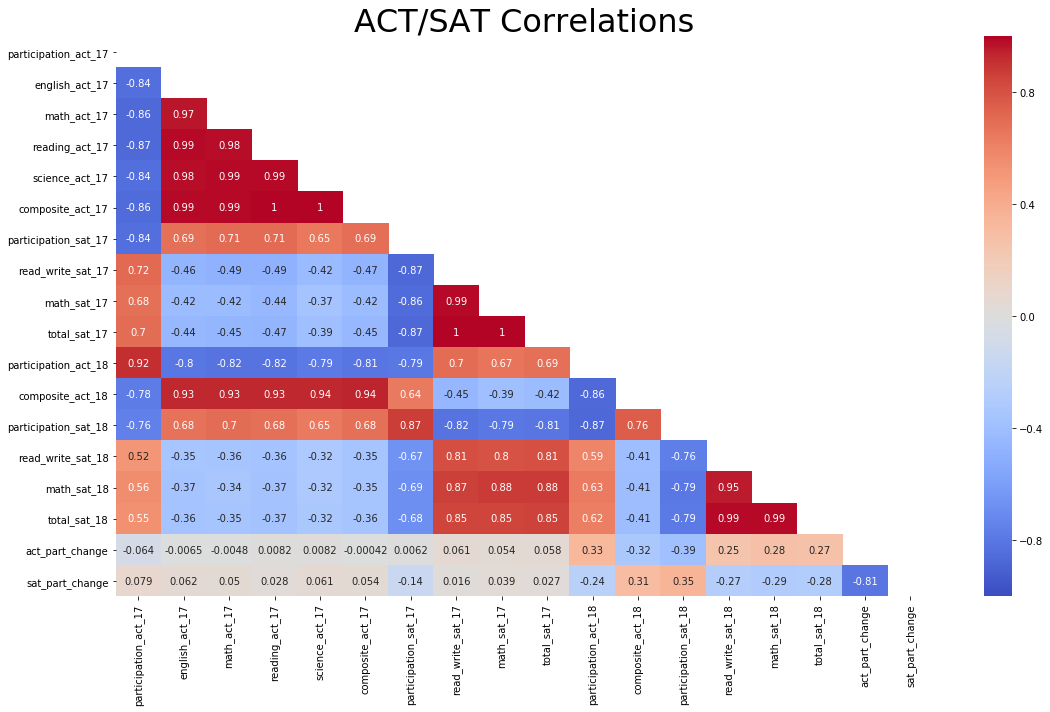

In [112]:
plt.figure(figsize=(16,10))
plt.title('ACT/SAT Correlations', size=32)
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask, vmin=-1, vmax=1)
plt.tight_layout();